In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
pip install numpy==1.26.4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
df=pd.read_csv(r"J:\stocks.csv")

In [9]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [10]:
df.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [13]:
df.describe

<bound method NDFrame.describe of     Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  6412

In [17]:
df.select_dtypes(include='number').corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999626,0.999650,0.999176,0.999173,-0.547741
High,0.999626,1.000000,0.999654,0.999644,0.999640,-0.546175
Low,0.999650,0.999654,1.000000,0.999663,0.999661,-0.544590
Close,0.999176,0.999644,0.999663,1.000000,0.999999,-0.544194
Adj Close,0.999173,0.999640,0.999661,0.999999,1.000000,-0.544370
Volume,-0.547741,-0.546175,-0.544590,-0.544194,-0.544370,1.000000


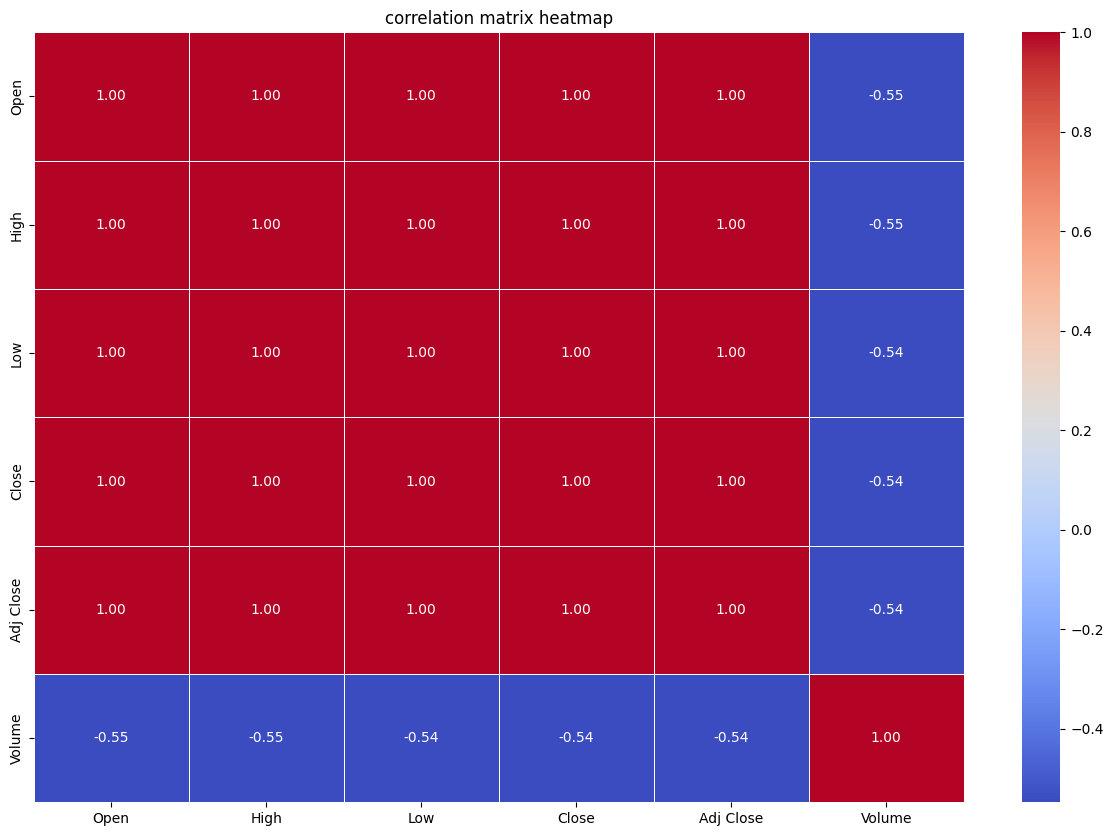

In [22]:
correlation_matrix=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5,fmt='.2f')
plt.title("correlation matrix heatmap")
plt.show()

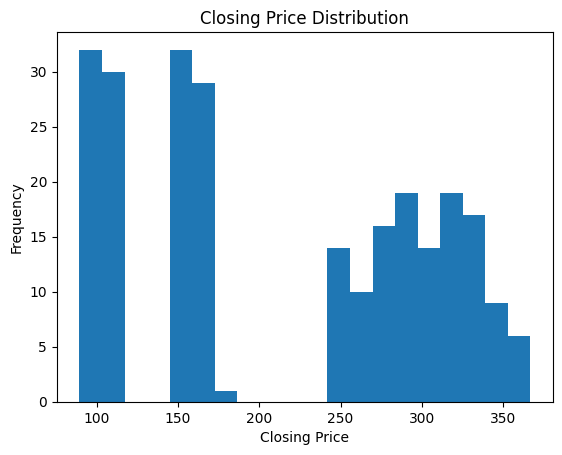

In [24]:
plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

Text(0.5, 1.0, 'Total Volume by Ticker')

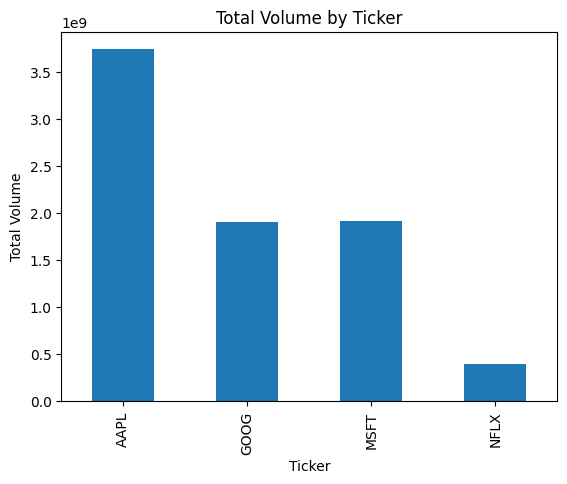

In [25]:
ticker_volume = df.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')

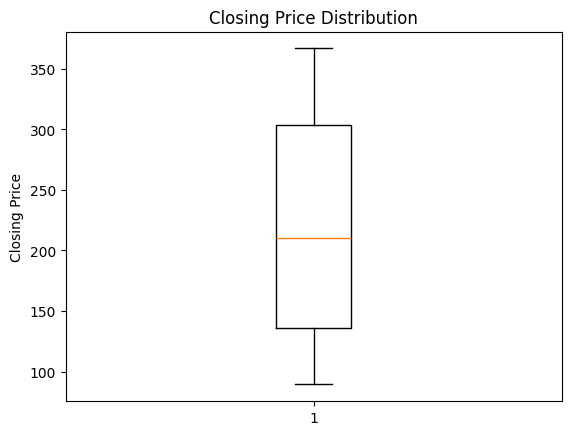

In [26]:
plt.boxplot(df['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()